In [1]:
%load_ext autoreload
%autoreload 2

In [270]:
import sts
from scipy import stats

# 1. Damage Throughput

The goal of this notebook is to try and model a damage throughput analysis.

Initial questions:
- What's the average deck damage per turn?
- How does removing specific cards affects this average?
- How does removing specific cards affects the variance of the damage distribution?

## 1.2 Average Damage

In [41]:
game = sts.GameState()

Draw Pile


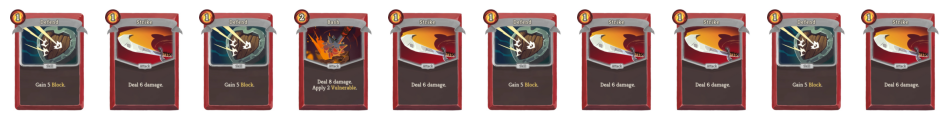

Hand
Discard Pile


In [42]:
game.display()

In [49]:
game.hand.draw()

Draw Pile
Hand


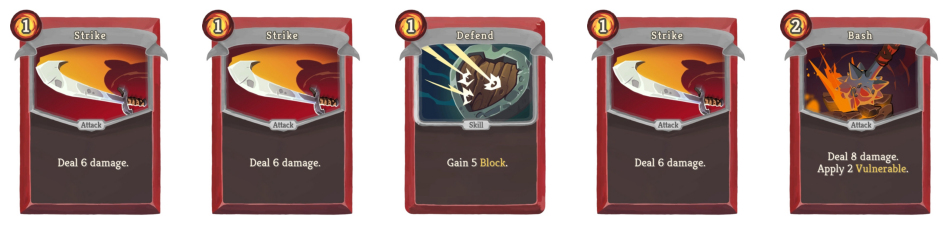

Discard Pile


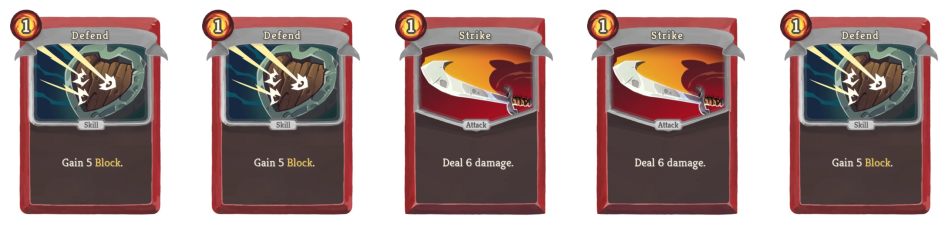

In [118]:
game.display()

In [264]:
n_battles = 10000
n_turns = 10

In [265]:
import numpy as np

In [266]:
dmg_list = []

for i in range(n_battles):
    damage_dealt, cards_played = game.simulate_battle(num_turns=n_turns)

    dmg_list.append(damage_dealt)

    battle[i] = [damage_dealt, cards_played]

dmg_list = np.array(dmg_list)

In [272]:
for i in range(n_turns):
    print(stats.mode(dmg_list[:, i]))

ModeResult(mode=17.0, count=4890)
ModeResult(mode=17.0, count=5029)
ModeResult(mode=21.0, count=2545)
ModeResult(mode=17.0, count=4961)
ModeResult(mode=21.0, count=3750)
ModeResult(mode=17.0, count=4972)
ModeResult(mode=21.0, count=4313)
ModeResult(mode=17.0, count=4991)
ModeResult(mode=21.0, count=4696)
ModeResult(mode=17.0, count=4892)


In [268]:
for i in range(n_turns):
    print(dmg_list[:, i].std())

2.534591217533904
4.842259600641007
4.435312587631226
4.850604241741435
4.379138504317944
4.894956849656593
4.236492695615089
4.905926741197834
4.007839298175514
4.900346726508237


In [261]:
dmg_list[:, 0]

array([18., 12., 12., ..., 18., 18., 12.])

In [262]:
dmg_list

array([[18., 17., 27., 17., 21.],
       [12., 17., 18., 17., 18.],
       [12., 17., 21., 27., 18.],
       ...,
       [18., 18., 17., 27., 17.],
       [18., 17., 21., 27., 21.],
       [12., 17., 27., 17., 27.]])